In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1, 0.35, ' 신뢰구간 95% 에 대한 오차 한계( $e_{95}) : $ \n${1.960}\\sqrt{\\dfrac{\\widehat{p}_{1}\\widehat{q}_{1}}{n}+\\dfrac{\\widehat{p}_{2}\\widehat{q}_{2}}{m}}$ = 0.069 ')

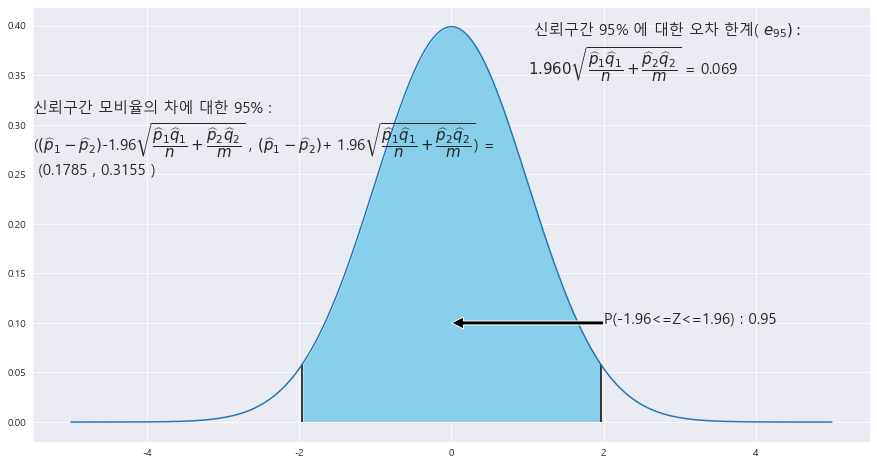

In [2]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95#신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)


p1 = 0.839
p2 = 0.592
A = 256
B = 348
ax.text(-5.5 , .25, f'신뢰구간 모비율의 차에 대한 {trust}% : \n' + r'($\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$' +' , '+ r'$\left(\widehat{p}_{1} - \widehat{p}_{2}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$) =' + f'\n ({round(p1-p2 - z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} , {round(p1-p2 + z_1* math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),4)} )',fontsize=15)


ax.text(1 , .35, f' 신뢰구간 {trust}% 에 대한 오차 한계( ' +r'$e_{%d}) : $ '% trust + f'\n' + r'${%.3f}\sqrt{\dfrac{\widehat{p}_{1}\widehat{q}_{1}}{n}+\dfrac{\widehat{p}_{2}\widehat{q}_{2}}{m}}$ = '% z_1 + f'{round((z_1)*math.sqrt(p1*(1-p1)/A + p2*(1-p2)/B),3)} ' , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.35, '사전정보 p가 있는 경우 n$\\geq\\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$')

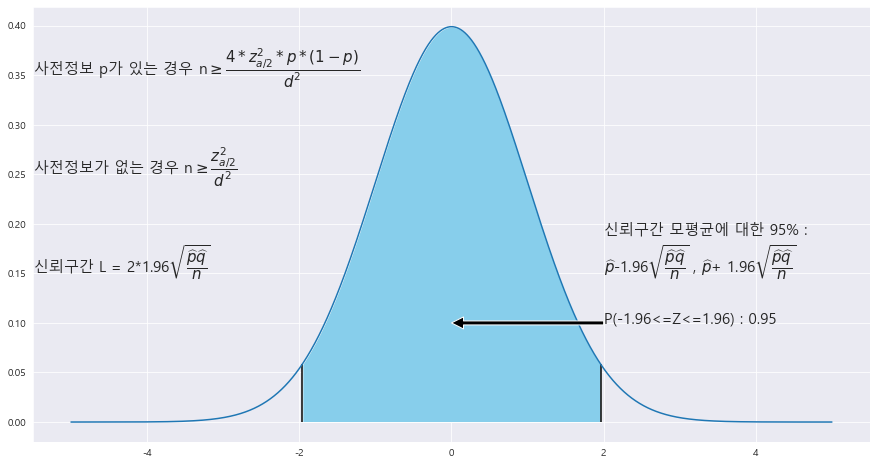

In [3]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

#
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$',fontsize=15)

ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


66.64


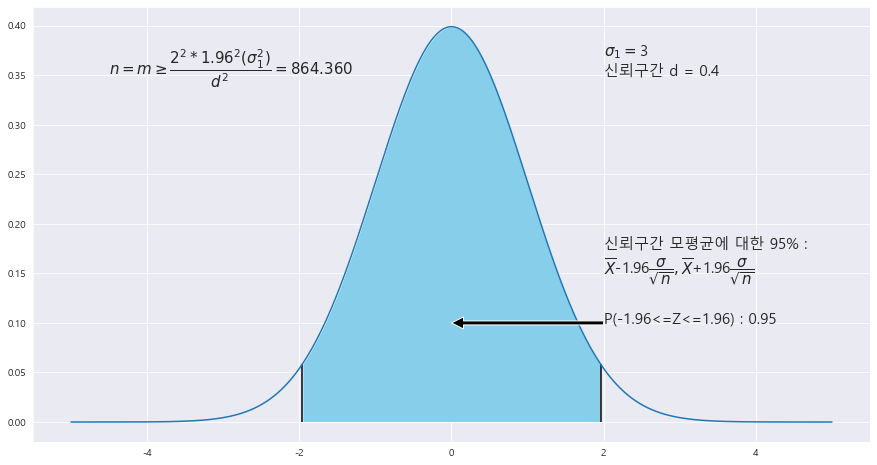

In [5]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

d = 0.4 # 신뢰구간
o1 = 3 #모 표준편차 1
#o2 = 3 #모 표준편차 2
ax.text(2 , .35,  r'$\sigma_{1} = $' + f'{o1}\n'  + f'신뢰구간 d = {d}',fontsize=15)
c = 2**2 * z_1**2*(o1**2 ) / d**2
ax.text(-4.5 , .35,  r'$n=m\geq\dfrac{{%2d}^{2}*{%.2f}^{2}(\sigma^2_{1})}{d ^{2}} = {%.3f}$'% (2 , z_1 ,c) ,fontsize=15)
print(4*z_1 * (5**2 + 3**2) / 2**2)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-5.5, 0.35, '사전정보 p가 있는 경우 n$\\geq\\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$ = 501.3072')

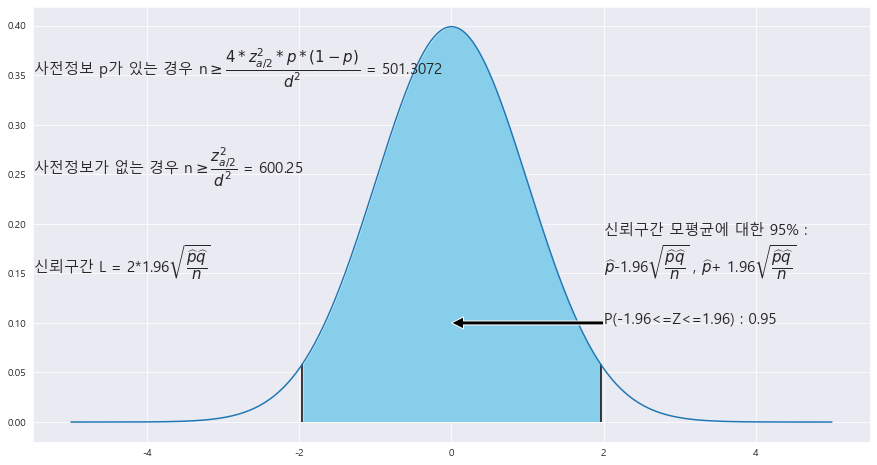

In [9]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

d = 0.08
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$' + f' = {round(z_1**2 / d**2,2)}',fontsize=15)
p = 0.297
ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$' + f' = {round(4*z_1**2 * p *(1-p) / d**2,4)}',fontsize=15)

In [ ]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
#\widehat{p}-\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}


ax.text(-5.5 , .15, f'신뢰구간 L = 2*{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

d = 0.08
ax.text(-5.5 , .25, f'사전정보가 없는 경우 n' + r'$\geq\dfrac{z^2_{a/2}}{d^2}$' + f' = {round(z_1**2 / d**2,2)}',fontsize=15)
p = 0.297
ax.text(-5.5 , .35, f'사전정보 p가 있는 경우 n' + r'$\geq\dfrac{4*z^2_{a/2}*{p}*{(1-p)}}{d^2}$' + f' = {round(4*z_1**2 * p *(1-p) / d**2,4)}',fontsize=15)